To write code for face detection using PyTorch

we need to have PyTorch installed along with a pre-trained model that can perform face detection.

A common approach is to use a convolutional neural network (CNN) that has been trained on a dataset containing faces.

For this task, we can use the popular MTCNN (Multi-task Cascaded Convolutional Networks) which is widely used for face detection, and there's a handy implementation of MTCNN available in Python.




In [2]:
!pip install torch torchvision facenet-pytorch matplotlib opencv-python

In [3]:
import torch
from facenet_pytorch import MTCNN
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
# Check if a GPU is available and if not, use a CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Create an instance of the MTCNN face detector
mtcnn = MTCNN(keep_all=True, device=device)


In [5]:
# Load an image using OpenCV
# Replace 'path_to_your_image.jpg' with the path to the image you want to use
image = cv2.imread('/content/facenet-mtcnn.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to PIL format
pil_image = Image.fromarray(image)

# Use MTCNN to detect faces in the image
boxes, _ = mtcnn.detect(pil_image)

Number of faces detected: 5


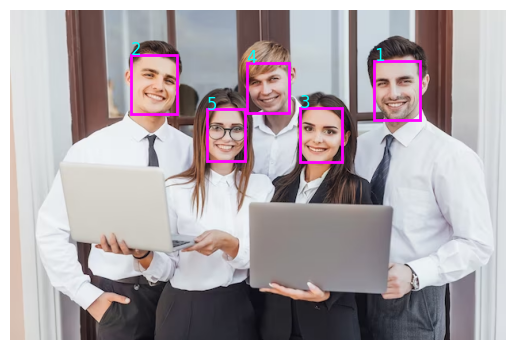

In [13]:
# Draw bounding boxes and label each face
fig, ax = plt.subplots()
ax.imshow(image)

if boxes is not None:
    for i, box in enumerate(boxes):
        ax.text(box[0], box[1], str(i+1), fontsize=12, color='cyan')
        rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color='magenta', linewidth=2)
        ax.add_patch(rect)

    # Print the number of faces detected
    print(f"Number of faces detected: {len(boxes)}")
else:
    print("No faces detected.")

plt.axis('off')
plt.show()